## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import scipy

In [3]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [4]:
print(df)

       inputs ClimbRate  Sgz     P     Q  CurPitch  CurRoll  AbsRoll  DiffClb  \
0                   -17   -6 -0.03  0.14      0.59     -0.5      -11       -9   
1                  -791   15 -0.28 -0.34      1.11      0.9      -10       27   
2                   -46   48 -0.42  0.07      0.57      0.6       -5       -8   
3                   496   -5 -0.21 -0.04      0.03     -0.5       -7        6   
4                  -124   16 -0.02  0.05      0.61     -0.2       -9       -3   
...                 ...  ...   ...   ...       ...      ...      ...      ...   
13745               -53  -13 -0.07  0.02      0.58     -2.3      -15       12   
13746                 1    4 -0.11 -0.07      0.47      0.8       -5        8   
13747               425  -14  0.40  0.07      0.41     -2.1      -16       12   
13748               102  -10 -0.19  0.08      1.30      0.5      -10       -3   
13749              -165   52  0.08  0.42      1.07     -1.6      -22      -15   

       DiffRollRate  DiffDi

In [5]:
# Prepare data
feature_data = df.iloc[:,:-1]
goal = df.iloc[:,-1]

In [6]:
# split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_data, goal, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_valid = train_test_split(X_train, y_train, test_size=15/(70+15), random_state=1)

In [7]:
# Standardize the data using StandardScaler from sklearn
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_val_stand = scaler.transform(X_val)
X_test_stand = scaler.transform(X_test)

In [8]:
# Insert the first column of all  1 s in the training, validation, and test set
one_train = np.ones(np.shape(X_train)[0]).reshape(X_train.shape[0],1)
one_val = np.ones(np.shape(X_val)[0]).reshape(X_val.shape[0],1)
one_test = np.ones(np.shape(X_test)[0]).reshape(X_test.shape[0],1)

X_train_1f = np.hstack((one_train, X_train_stand))
X_val_1f = np.hstack((one_val, X_val_stand))
X_test_1f = np.hstack((one_test, X_test_stand))

Each time we update the weights is called an iteration. Each time the model sees(learns) the whole dataset is called an epoch.

For the Mini-batch Gradient Descent, we break the dataset to k smaller batches(mini batch). So we have k iterations. And one epoch takes k iterations.

For the Stochastic Gradient Descent (SGD), each of the n samples is a batch. So we have n iterations. And one epoch takes n iterations.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [9]:
def rmse(Pred, Actual):
    return np.sqrt(mean_squared_error(Pred, Actual))

In [10]:
def Direct_sol(X_train, y_train, X_valid, y_valid):
    W = np.dot(scipy.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
    y_pred_train = np.dot(X_train, W) # prediction on the training set
    y_pred_valid = np.dot(X_valid, W) # prediction on the validation set
    RMSE_train = rmse(y_pred_train, y_train)
    RMSE_valid = rmse(y_pred_valid, y_valid)
    print ("RMSE on training set: " , RMSE_train)
    print ("RMSE on validation set: " , RMSE_valid)
    return W, y_pred_train , y_pred_valid , RMSE_train , RMSE_valid

In [11]:
W, y_pred_train_direct , y_pred_valid_direct , RMSE_train_direct , RMSE_valid_direct = Direct_sol(X_train_1f, y_train, X_val_1f, y_valid)

RMSE on training set:  0.00017885992763695067
RMSE on validation set:  0.0001741185313589718


The RMSE for the training set is 0.00017885992763695067.

The RMSE for the validation set is 0.0001741185313589718.

## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [12]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##

CT = 1.1001 * RMSE_valid_direct 
# Initial weight
w = (np.random.random(41)/10000).reshape(1,-1)
lr = 0.01 # Learning Rate
rmse_train_list = []
rmse_val_list = []

for epoch in range (0, 5000): 
    y_pred_train = np.dot(X_train_1f,w.T).reshape (-1,1)
    y_pred_valid = np.dot(X_val_1f,w.T).reshape (-1,1)
    rmse_train = rmse(y_pred_train,y_train)
    rmse_val = rmse(y_pred_valid,y_valid)
    rmse_train_list.append(rmse_train)
    rmse_val_list.append(rmse_val)
    gradient = ((1/X_train_1f.shape[0]) * np.dot(X_train_1f.T,  y_pred_train - (np.array(y_train)).reshape(-1,1))).reshape(1,-1)
    w = w - lr * gradient # weight update
    
    if rmse_val <= CT :
        break

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 0.22964191436767578 (s) ---


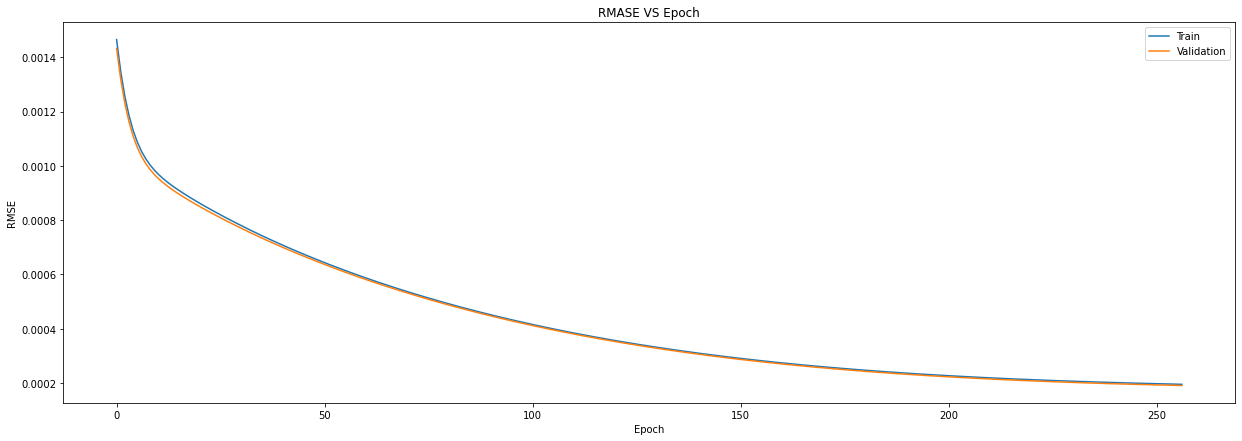

In [13]:
# Plot the training RMSE and the validation RMSE vs. epoch on the same figure
plt.figure(figsize=(21,7))
plt.plot(rmse_train_list, label = 'Train')
plt.plot(rmse_val_list, label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMASE VS Epoch')
plt.legend()
plt.show()

In [14]:
print(len(rmse_train_list))

257


By setting the initial value of weight with very small value which is smaller than 0.001, we can have less number of epoch (around 250 epoches) to reach the threshold.

By observing the training and validation RMSE, we can say that the model fit well. Not overfit or underfit.
Both training and validation RMSE decrease monotonically as we doing more epoches until the model's RMSE converges.
Training and validation RMSE are very close to each other. And they both have a very small RMSE which is near 0.0002 eventually.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [15]:
def minibatchGD(X_train, X_val, y_train, y_val, batch_size, lr, CT):
    y_train = np.array(y_train).reshape(-1,1)
    # set the initial value of weight smaller than 0.0001
    w = (np.random.random(41)/10000).reshape(1,-1)
    rmse_trainbatch_list = []
    rmse_valbatch_list = []
    time_list = []
    epoch_time = 0
    iteration = int(X_train.shape[0]/batch_size)
    
    for i in range(100): # epoch    
        # although the epoch size is setted large, but for the model with specific batch size that can converge, it will 
        # not needs such much epoch. It will stop needing more epoch when the threshold is reached.
        
        start_time = time.time()
        for j in range(iteration):      # iteration
            
            if j != (iteration-1):
                X_batch = X_train[ batch_size * j:batch_size * (j+1) ,:]
                y_batch = y_train[ batch_size * j:batch_size * (j+1) ,:]
            else:
                X_batch = X_train[batch_size * j:,:]
                y_batch = y_train[batch_size * j:,:]
                
            y_pred_train = np.dot(X_batch,w.T).reshape (-1,1)
            y_pred_valid = np.dot(X_val,w.T).reshape (-1,1)
        
            rmse_trainbatch = rmse(y_pred_train,y_batch)
            rmse_valbatch = rmse(y_pred_valid,y_valid)
        
            gradient = ((1/X_batch.shape[0]) * np.dot(X_batch.T,  y_pred_train - y_batch)).reshape(1,-1)
            w = w - lr * gradient
        
        epoch_time = epoch_time + (time.time() - start_time)
        time_list.append(epoch_time)
        
        rmse_trainbatch_list.append(rmse_trainbatch)
        rmse_valbatch_list.append(rmse_valbatch)
        
        if rmse_valbatch_list[-1] <= CT :
            break

        permutation = np.random.permutation(X_train.shape[0])
        X_train = X_train[permutation]
        y_train = y_train[permutation]
    return w, rmse_trainbatch_list, rmse_valbatch_list, time_list

After trying different batch size, the batch size which is smaller or equal to 32 will be diverge. So I choose batch size with 64,128,256,512,1024 and 2048 to perform mini-batch gradient and plot.

In [148]:
w_64, rmse_trainbatch_list_64, rmse_valbatch_list_64, time_list_64 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 64, 0.01, CT)
w_128, rmse_trainbatch_list_128, rmse_valbatch_list_128, time_list_128 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 128, 0.01, CT)
w_256, rmse_trainbatch_list_256, rmse_valbatch_list_256, time_list_256 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 256, 0.01, CT)
w_512, rmse_trainbatch_list_512, rmse_valbatch_list_512, time_list_512 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.01, CT)
w_1024, rmse_trainbatch_list_1024, rmse_valbatch_list_1024, time_list_1024 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 1024, 0.01, CT)
w_2048, rmse_trainbatch_list_2048, rmse_valbatch_list_2048, time_list_2048 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 2048, 0.01, CT)

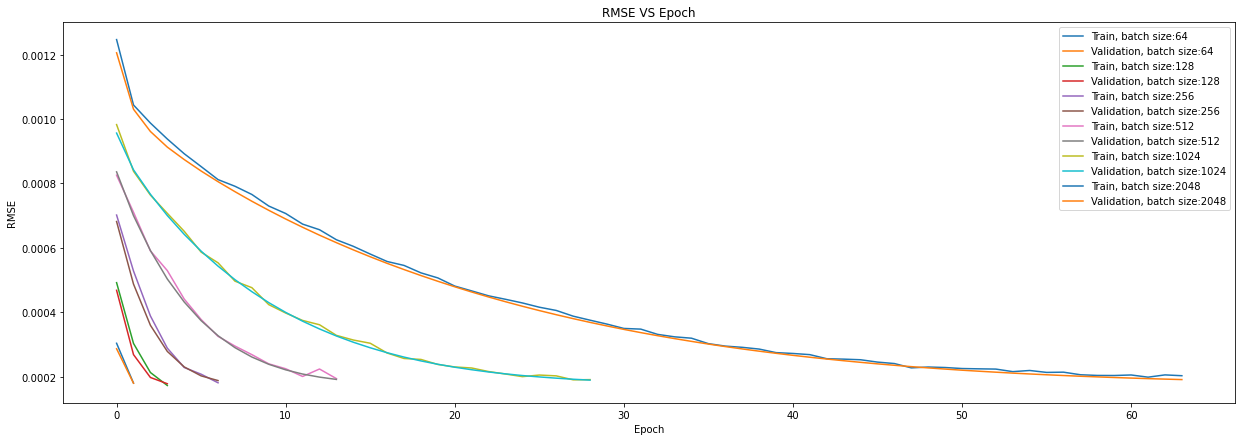

In [149]:
# Plot training and validation RMSE vs. epoch for all the converging batch sizes 
plt.figure(figsize=(21,7))

plt.plot(range(len(rmse_trainbatch_list_64)), rmse_trainbatch_list_64, label = 'Train, batch size:{}'.format(64))
plt.plot(range(len(rmse_valbatch_list_64)), rmse_valbatch_list_64, label = 'Validation, batch size:{}'.format(64))

plt.plot(range(len(rmse_trainbatch_list_128)), rmse_trainbatch_list_128, label = 'Train, batch size:{}'.format(128))
plt.plot(range(len(rmse_valbatch_list_128)), rmse_valbatch_list_128, label = 'Validation, batch size:{}'.format(128))

plt.plot(range(len(rmse_trainbatch_list_256)), rmse_trainbatch_list_256, label = 'Train, batch size:{}'.format(256))
plt.plot(range(len(rmse_valbatch_list_256)), rmse_valbatch_list_256, label = 'Validation, batch size:{}'.format(256))

plt.plot(range(len(rmse_trainbatch_list_512)), rmse_trainbatch_list_512, label = 'Train, batch size:{}'.format(512))
plt.plot(range(len(rmse_valbatch_list_512)), rmse_valbatch_list_512, label = 'Validation, batch size:{}'.format(512))

plt.plot(range(len(rmse_trainbatch_list_1024)), rmse_trainbatch_list_1024, label = 'Train, batch size:{}'.format(1024))
plt.plot(range(len(rmse_valbatch_list_1024)), rmse_valbatch_list_1024, label = 'Validation, batch size:{}'.format(1024))

plt.plot(range(len(rmse_trainbatch_list_2048)), rmse_trainbatch_list_2048, label = 'Train, batch size:{}'.format(2048))
plt.plot(range(len(rmse_valbatch_list_2048)), rmse_valbatch_list_2048, label = 'Validation, batch size:{}'.format(2048))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE VS Epoch')
plt.legend()

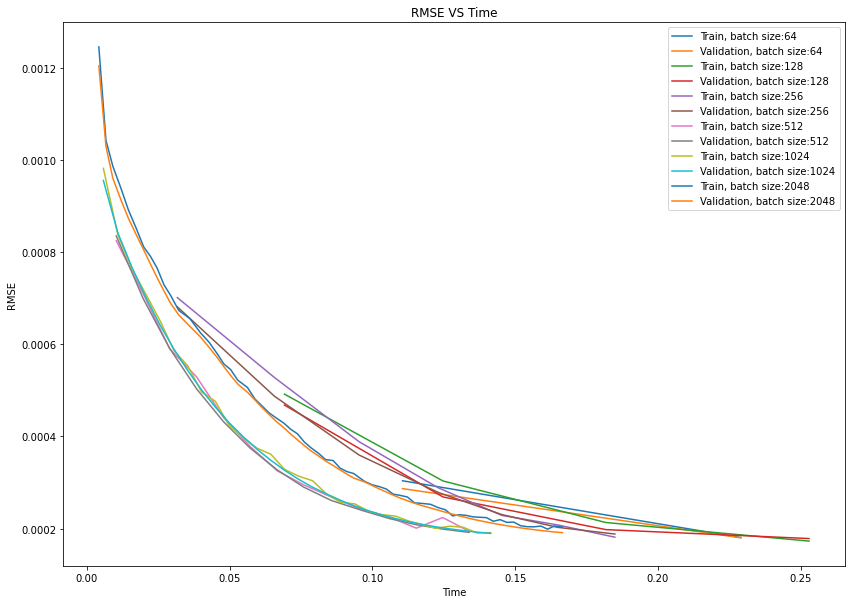

In [150]:
# Plot training and validation RMSE vs. time for all the converging batch sizes in a figure
plt.figure(figsize=(14,10))

plt.plot(time_list_64, rmse_trainbatch_list_64, label = 'Train, batch size:{}'.format(64))
plt.plot(time_list_64, rmse_valbatch_list_64, label = 'Validation, batch size:{}'.format(64))

plt.plot(time_list_128, rmse_trainbatch_list_128, label = 'Train, batch size:{}'.format(128))
plt.plot(time_list_128, rmse_valbatch_list_128, label = 'Validation, batch size:{}'.format(128))

plt.plot(time_list_256, rmse_trainbatch_list_256, label = 'Train, batch size:{}'.format(256))
plt.plot(time_list_256, rmse_valbatch_list_256, label = 'Validation, batch size:{}'.format(256))

plt.plot(time_list_512, rmse_trainbatch_list_512, label = 'Train, batch size:{}'.format(512))
plt.plot(time_list_512, rmse_valbatch_list_512, label = 'Validation, batch size:{}'.format(512))

plt.plot(time_list_1024, rmse_trainbatch_list_1024, label = 'Train, batch size:{}'.format(1024))
plt.plot(time_list_1024, rmse_valbatch_list_1024, label = 'Validation, batch size:{}'.format(1024))

plt.plot(time_list_2048, rmse_trainbatch_list_2048, label = 'Train, batch size:{}'.format(2048))
plt.plot(time_list_2048, rmse_valbatch_list_2048, label = 'Validation, batch size:{}'.format(2048))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('RMSE VS Time')
plt.legend()

Text(0.5, 1.0, 'Total training time VS Batch Size')

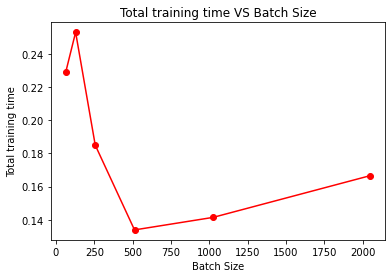

In [151]:
# Plot Total training time (y-axis) vs. Batch size (x-axis)
total_time_list = [time_list_64[-1], time_list_128[-1], time_list_256[-1], time_list_512[-1], time_list_1024[-1], time_list_2048[-1]]
batch_size_list = [64,128,256,512,1024,2048]
plt.plot(batch_size_list,total_time_list,'r-o')
plt.xlabel('Batch Size')
plt.ylabel('Total training time')
plt.title('Total training time VS Batch Size')

In [152]:
epoch_list = [len(rmse_trainbatch_list_64),len(rmse_trainbatch_list_128),len(rmse_trainbatch_list_256),
              len(rmse_trainbatch_list_512),len(rmse_trainbatch_list_1024),len(rmse_trainbatch_list_2048)]
pd.DataFrame({'Batch size':batch_size_list, 'Epoch Needed':epoch_list})

,Batch size,Epoch Needed
0,64,2
1,128,4
2,256,7
3,512,14
4,1024,29
5,2048,64


In [153]:
pd.DataFrame({'Batch size':batch_size_list, 'Total training time':total_time_list })

,Batch size,Total training time
0,64,0.229040
1,128,0.252930
2,256,0.184915
3,512,0.133860
4,1024,0.141406
5,2048,0.166539


I set the initial value of weight smaller than 0.0001. And after trying different batch size, the batch size which is smaller or equal to 32 will be diverge. So I choose batch size with 64,128,256,512,1024 and 2048 to perform mini-batch gradient and plot. The model fits well with these different batch sizes and each of them performs convergence.

For the plot of training and validation RMSE vs. epoch for all the converging batch sizes, I find that the RMSE decreases as we have more epoches. This means the model converges as performing more epoches. In addition, the model converges faster and have fewer epoches with smaller batch size. The batch size 64 only needs to perform 2 epoches (the least number of epoch) to reach the RMSE threshold we set. The batch size 2048 needs to perform the most number of epoches to reach the RMSE threshold we set. We can see for each batch size, the training and valudation RMSE are close. This indicates the model fits well. 

For the plot of training and validation RMSE vs. time for all the converging batch sizes, I find that the model converges as training time goes. The model with batch size 64 and 128 has relatively a bit longer training time compared to other batch size model due to the reason that the model has more iterations needed to train.We can see for each batch size, the training and valudation RMSE are close. This indicates the model fits well. 

For the plot of Total training time vs. Batch size, I find that the total traing time will be increase as the batch size increase in general. But for our project, specifically speaking, batch size 512 has the minimum total traing time. The total training time decreases from batch size 64 to batch size 512 and then increases from batch size 1024 to batch size 2048.

In summary, smaller batch size has faster convergence speed, needs less total training time and less epoch to perform to reach the threshold. The model with small batch size will has more iterations so that they can have less epoch to perform to converge to the threshold we set. However, the model's total training time will decrease until with some point or with some batch size. After that batch size, the model's total training time will not decrease but increases.

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

The reason why the learning rate 0.01 makes the batch size which is smaller than 64 divergent is that the learning rate is too large for that batch rate. For smaller batch size, we need smaller learning rate to make it converge.

Pick batch size that are not convergeing with a learning rate of  𝛼=0.01: 8, 16, 32

For Batch size = 32, I will try learning rate 0.006, 0.005, 0.004, 0.003, 0.002, 0.001. And try 30 times for each learning rate and plot the RMSE to see whether all the times the model converges, so that we can make decision whether the convergence happens by chance.

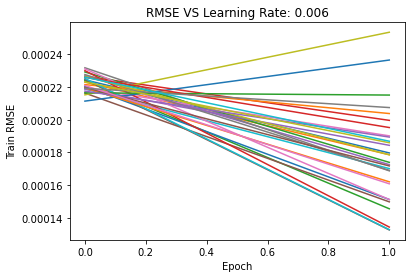

In [51]:
# learning rate = 0.006
for i in range(30):
    w_32, rmse_trainbatch_list_32, rmse_valbatch_list_32, time_list_32 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 32, 0.006, CT)
    plt.plot(rmse_trainbatch_list_32)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.006')

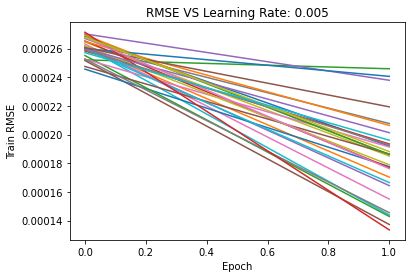

In [52]:
# learning rate = 0.005
for i in range(30):
    w_32, rmse_trainbatch_list_32, rmse_valbatch_list_32, time_list_32 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 32, 0.005, CT)
    plt.plot(rmse_trainbatch_list_32)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.005')

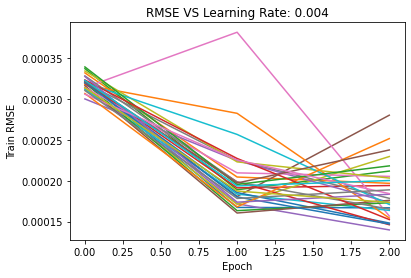

In [53]:
# learning rate = 0.004
for i in range(30):
    w_32, rmse_trainbatch_list_32, rmse_valbatch_list_32, time_list_32 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 32, 0.004, CT)
    plt.plot(rmse_trainbatch_list_32)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.004')

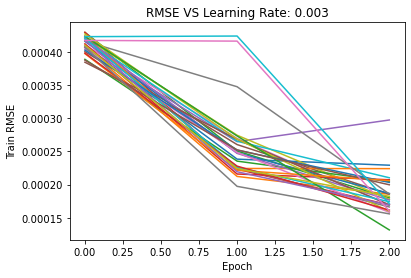

In [54]:
# learning rate = 0.003
for i in range(30):
    w_32, rmse_trainbatch_list_32, rmse_valbatch_list_32, time_list_32 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 32, 0.003, CT)
    plt.plot(rmse_trainbatch_list_32)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.003')

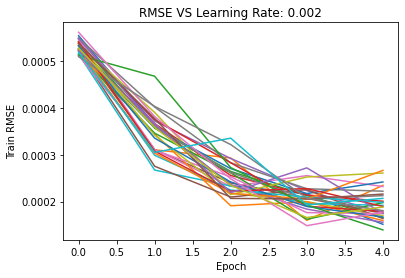

In [55]:
# learning rate = 0.002
for i in range(30):
    w_32, rmse_trainbatch_list_32, rmse_valbatch_list_32, time_list_32 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 32, 0.002, CT)
    plt.plot(rmse_trainbatch_list_32)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.002')

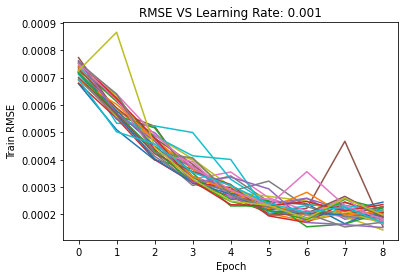

In [56]:
# learning rate = 0.001
for i in range(30):
    w_32, rmse_trainbatch_list_32, rmse_valbatch_list_32, time_list_32 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 32, 0.001, CT)
    plt.plot(rmse_trainbatch_list_32,)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.001')

As we can see from the 5 plots above, the learning rate 0.001 can make sure all the times the model converges and it does not happen only by chance. So I choose leaning rate = 0.001 that results in convergence for batch size = 32.

In [57]:
np.random.seed(7)
w_32, rmse_trainbatch_list_32, rmse_valbatch_list_32, time_list_32 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 32, 0.001, CT)

For batch 16, I will try learning rate 0.002, 0.001, 0.0009, 0.0008. And try 30 times for each learning rate and plot the RMSE to see whether all the times the model converges or relatively have a great number of times that converges, so that we can make decision whether the convergence happens by chance.

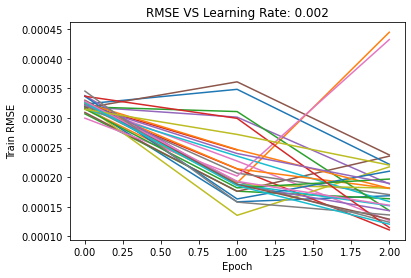

In [58]:
# learning rate = 0.002
for i in range(30):
    w_16, rmse_trainbatch_list_16, rmse_valbatch_list_16, time_list_16 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 16, 0.002, CT)
    plt.plot(rmse_trainbatch_list_16)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.002')

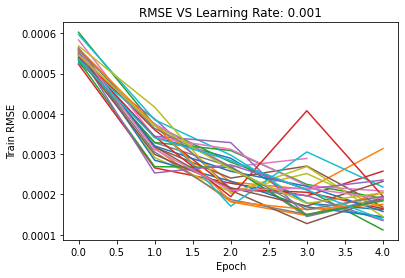

In [59]:
# learning rate = 0.001
for i in range(30):
    w_16, rmse_trainbatch_list_16, rmse_valbatch_list_16, time_list_16 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 16, 0.001, CT)
    plt.plot(rmse_trainbatch_list_16)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.001')

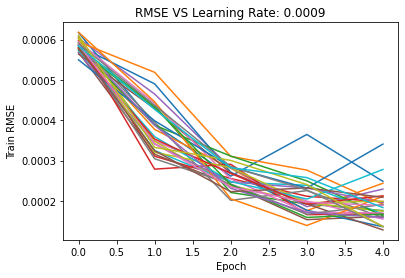

In [60]:
# learning rate = 0.0009
for i in range(30):
    w_16, rmse_trainbatch_list_16, rmse_valbatch_list_16, time_list_16 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 16, 0.0009, CT)
    plt.plot(rmse_trainbatch_list_16)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.0009')

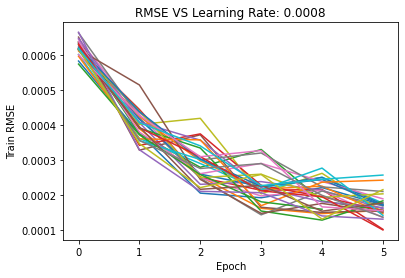

In [74]:
# learning rate = 0.0008
for i in range(30):
    w_16, rmse_trainbatch_list_16, rmse_valbatch_list_16, time_list_16 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 16, 0.0008, CT)
    plt.plot(rmse_trainbatch_list_16)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.0008')

As we can see from the 4 plots above, the learning rate 0.0008 gives a relative best result which can make sure all the times the model converges and it does not happen only by chance. So I choose leaning rate = 0.0008 that results in convergence for batch size = 16.

In [62]:
np.random.seed(7)
w_16, rmse_trainbatch_list_16, rmse_valbatch_list_16, time_list_16 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 16, 0.0008, CT)

For batch 8, I will try learning rate 0.0009, 0.0008, 0.0006, 0.0005, 0.0004. And do like before for batch size 32 and 16.

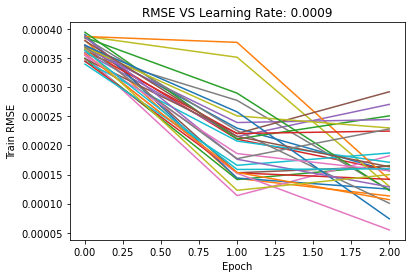

In [80]:
# learning rate = 0.0009
for i in range(30):
    w_8, rmse_trainbatch_list_8, rmse_valbatch_list_8, time_list_8 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 8, 0.0009, CT)
    plt.plot(rmse_trainbatch_list_8)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.0009')

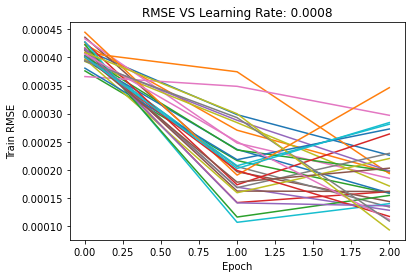

In [81]:
# learning rate = 0.0008
for i in range(30):
    w_8, rmse_trainbatch_list_8, rmse_valbatch_list_8, time_list_8 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 8, 0.0008, CT)
    plt.plot(rmse_trainbatch_list_8)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.0008')

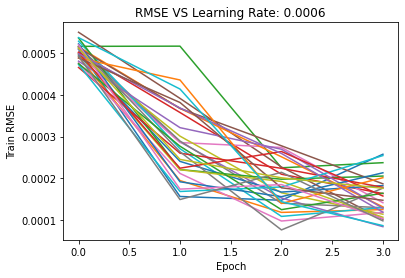

In [82]:
# learning rate = 0.0006
for i in range(30):
    w_8, rmse_trainbatch_list_8, rmse_valbatch_list_8, time_list_8 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 8, 0.0006, CT)
    plt.plot(rmse_trainbatch_list_8)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.0006')

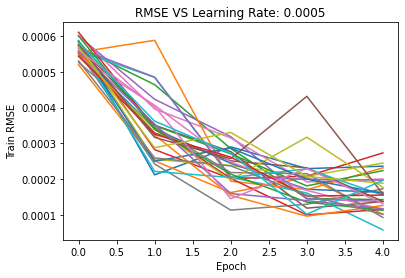

In [85]:
# learning rate = 0.0005
for i in range(30):
    w_8, rmse_trainbatch_list_8, rmse_valbatch_list_8, time_list_8 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 8, 0.0005, CT)
    plt.plot(rmse_trainbatch_list_8)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.0005')

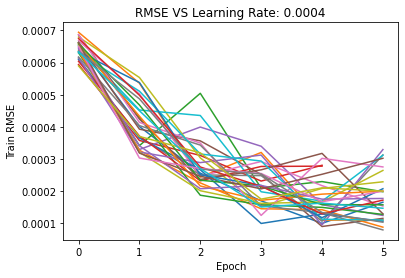

In [86]:
# learning rate = 0.0004
for i in range(30):
    w_8, rmse_trainbatch_list_8, rmse_valbatch_list_8, time_list_8 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 8, 0.0004, CT)
    plt.plot(rmse_trainbatch_list_8)
    plt.xlabel('Epoch')
    plt.ylabel('Train RMSE')
    plt.title('RMSE VS Learning Rate: 0.0004')

As we can see from the 5 plots above, the learning rate 0.0005 gives a relative best result which can make sure most of the times the model converges and it does not happen only by chance. So I choose leaning rate = 0.0005 that results in convergence for batch size = 8.

In [87]:
np.random.seed(7)
w_8, rmse_trainbatch_list_8, rmse_valbatch_list_8, time_list_8 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 8, 0.0005, CT)

In [88]:
batch_list_lr = [32,16,8]
learning_rate_list = [0.001, 0.0008, 0.0005]
training_RMSE_list_lr = [rmse_trainbatch_list_32[-1],rmse_trainbatch_list_16[-1],rmse_trainbatch_list_8[-1]]
validation_RMSE_list_lr = [rmse_valbatch_list_32[-1],rmse_valbatch_list_16[-1],rmse_valbatch_list_8[-1]]

table = pd.DataFrame({'Batch Size':batch_list_lr, 'Learning Rate':learning_rate_list, 
              'Training RMSE':training_RMSE_list_lr, 'Validation RMSE':validation_RMSE_list_lr})
table

,Batch Size,Learning Rate,Training RMSE,Validation RMSE
0,32,0.0010,0.000154,0.000185
1,16,0.0008,0.000258,0.000180
2,8,0.0005,0.000151,0.000180


Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

The best batchsize based on Part 4's fastest convergence time is batchsize 512. I select 11 learning rate (all converge): 0.02,0.015,0.01,0.0095,0.009,0.0085,0.008,0.0075,0.007,0.0065,0.006.

In [154]:
np.random.seed(7)
w_002, rmse_trainbatch_002, rmse_valbatch_002, time_002 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.02, CT)
w_0015, rmse_trainbatch_0015, rmse_valbatch_0015, time_0015 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.015, CT)
w_001, rmse_trainbatch_001, rmse_valbatch_001, time_001 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.01, CT)
w_00095, rmse_trainbatch_00095, rmse_valbatch_00095, time_00095 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.0095, CT)
w_0009, rmse_trainbatch_0009, rmse_valbatch_0009, time_0009 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.009, CT)
w_00085, rmse_trainbatch_00085, rmse_valbatch_00085, time_00085 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.0085, CT)
w_0008, rmse_trainbatch_0008, rmse_valbatch_0008, time_0008 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.008, CT)
w_00075, rmse_trainbatch_00075, rmse_valbatch_00075, time_00075 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.0075, CT)
w_0007, rmse_trainbatch_0007, rmse_valbatch_0007, time_0007 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.007, CT)
w_00065, rmse_trainbatch_00065, rmse_valbatch_00065, time_00065 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.0065, CT)
w_0006, rmse_trainbatch_0006, rmse_valbatch_0006, time_0006 = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.006, CT)

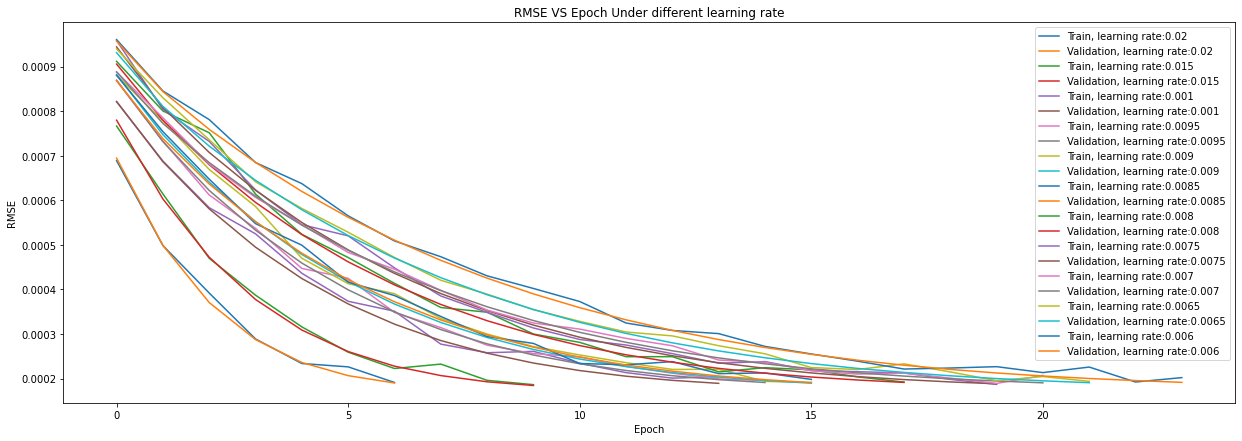

In [155]:
# Plot training and validation RMSE vs. epoch for all the learning rates
plt.figure(figsize=(21,7))

plt.plot(range(len(rmse_trainbatch_002)), rmse_trainbatch_002, label = 'Train, learning rate:{}'.format(0.02))
plt.plot(range(len(rmse_valbatch_002)), rmse_valbatch_002, label = 'Validation, learning rate:{}'.format(0.02))

plt.plot(range(len(rmse_trainbatch_0015)), rmse_trainbatch_0015, label = 'Train, learning rate:{}'.format(0.015))
plt.plot(range(len(rmse_valbatch_0015)), rmse_valbatch_0015, label = 'Validation, learning rate:{}'.format(0.015))

plt.plot(range(len(rmse_trainbatch_001)), rmse_trainbatch_001, label = 'Train, learning rate:{}'.format(0.001))
plt.plot(range(len(rmse_valbatch_001)), rmse_valbatch_001, label = 'Validation, learning rate:{}'.format(0.001))

plt.plot(range(len(rmse_trainbatch_00095)), rmse_trainbatch_00095, label = 'Train, learning rate:{}'.format(0.0095))
plt.plot(range(len(rmse_valbatch_00095)), rmse_valbatch_00095, label = 'Validation, learning rate:{}'.format(0.0095))

plt.plot(range(len(rmse_trainbatch_0009)), rmse_trainbatch_0009, label = 'Train, learning rate:{}'.format(0.009))
plt.plot(range(len(rmse_valbatch_0009)), rmse_valbatch_0009, label = 'Validation, learning rate:{}'.format(0.009))

plt.plot(range(len(rmse_trainbatch_00085)), rmse_trainbatch_00085, label = 'Train, learning rate:{}'.format(0.0085))
plt.plot(range(len(rmse_valbatch_00085)), rmse_valbatch_00085, label = 'Validation, learning rate:{}'.format(0.0085))

plt.plot(range(len(rmse_trainbatch_0008)), rmse_trainbatch_0008, label = 'Train, learning rate:{}'.format(0.008))
plt.plot(range(len(rmse_valbatch_0008)), rmse_valbatch_0008, label = 'Validation, learning rate:{}'.format(0.008))

plt.plot(range(len(rmse_trainbatch_00075)), rmse_trainbatch_00075, label = 'Train, learning rate:{}'.format(0.0075))
plt.plot(range(len(rmse_valbatch_00075)), rmse_valbatch_00075, label = 'Validation, learning rate:{}'.format(0.0075))

plt.plot(range(len(rmse_trainbatch_0007)), rmse_trainbatch_0007, label = 'Train, learning rate:{}'.format(0.007))
plt.plot(range(len(rmse_valbatch_0007)), rmse_valbatch_0007, label = 'Validation, learning rate:{}'.format(0.007))

plt.plot(range(len(rmse_trainbatch_00065)), rmse_trainbatch_00065, label = 'Train, learning rate:{}'.format(0.0065))
plt.plot(range(len(rmse_valbatch_00065)), rmse_valbatch_00065, label = 'Validation, learning rate:{}'.format(0.0065))

plt.plot(range(len(rmse_trainbatch_0006)), rmse_trainbatch_0006, label = 'Train, learning rate:{}'.format(0.006))
plt.plot(range(len(rmse_valbatch_0006)), rmse_valbatch_0006, label = 'Validation, learning rate:{}'.format(0.006))


plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE VS Epoch Under different learning rate')
plt.legend()
plt.show()

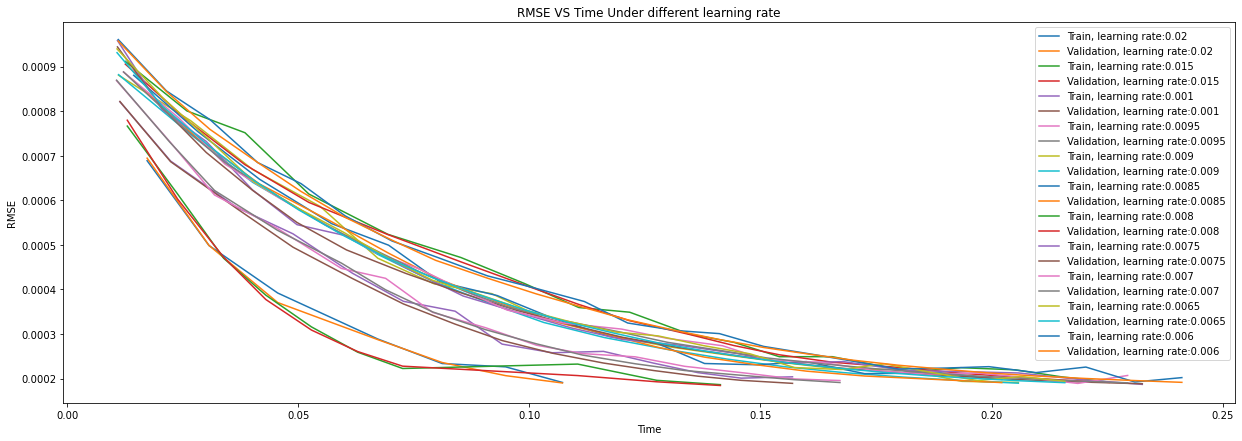

In [156]:
# Plot the training and validation RMSE vs. time for all the learning rates
plt.figure(figsize=(21,7))

plt.plot(time_002, rmse_trainbatch_002, label = 'Train, learning rate:{}'.format(0.02))
plt.plot(time_002, rmse_valbatch_002, label = 'Validation, learning rate:{}'.format(0.02))

plt.plot(time_0015, rmse_trainbatch_0015, label = 'Train, learning rate:{}'.format(0.015))
plt.plot(time_0015, rmse_valbatch_0015, label = 'Validation, learning rate:{}'.format(0.015))

plt.plot(time_001, rmse_trainbatch_001, label = 'Train, learning rate:{}'.format(0.001))
plt.plot(time_001, rmse_valbatch_001, label = 'Validation, learning rate:{}'.format(0.001))

plt.plot(time_00095, rmse_trainbatch_00095, label = 'Train, learning rate:{}'.format(0.0095))
plt.plot(time_00095, rmse_valbatch_00095, label = 'Validation, learning rate:{}'.format(0.0095))

plt.plot(time_0009, rmse_trainbatch_0009, label = 'Train, learning rate:{}'.format(0.009))
plt.plot(time_0009, rmse_valbatch_0009, label = 'Validation, learning rate:{}'.format(0.009))

plt.plot(time_00085, rmse_trainbatch_00085, label = 'Train, learning rate:{}'.format(0.0085))
plt.plot(time_00085, rmse_valbatch_00085, label = 'Validation, learning rate:{}'.format(0.0085))

plt.plot(time_0008, rmse_trainbatch_0008, label = 'Train, learning rate:{}'.format(0.008))
plt.plot(time_0008, rmse_valbatch_0008, label = 'Validation, learning rate:{}'.format(0.008))

plt.plot(time_00075, rmse_trainbatch_00075, label = 'Train, learning rate:{}'.format(0.0075))
plt.plot(time_00075, rmse_valbatch_00075, label = 'Validation, learning rate:{}'.format(0.0075))

plt.plot(time_0007, rmse_trainbatch_0007, label = 'Train, learning rate:{}'.format(0.007))
plt.plot(time_0007, rmse_valbatch_0007, label = 'Validation, learning rate:{}'.format(0.007))

plt.plot(time_00065, rmse_trainbatch_00065, label = 'Train, learning rate:{}'.format(0.0065))
plt.plot(time_00065, rmse_valbatch_00065, label = 'Validation, learning rate:{}'.format(0.0065))

plt.plot(time_0006, rmse_trainbatch_0006, label = 'Train, learning rate:{}'.format(0.006))
plt.plot(time_0006, rmse_valbatch_0006, label = 'Validation, learning rate:{}'.format(0.006))


plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('RMSE VS Time Under different learning rate')
plt.legend()
plt.show()

The best batchsize based on Part 4's fastest convergence time is batchsize 512. I select 11 learning rate (all converge): 0.02,0.015,0.01,0.0095,0.009,0.0085,0.008,0.0075,0.007,0.0065,0.006.

For the plot of training and validation RMSE vs. epoch for all the learning rates, the smaller learning rate for the specific batch size, the more epoches needed to train and perform to converge (to the threshold). Learning rate 0.02 performs/trains the least number of epoches. Learning rate 0.006 performs/trains the most number of epoches. We can see for each learning rate, the training and valudation RMSE are close. This indicates the model fits well. 


For the plot the training and validation RMSE vs. time for all the learning rates, the smaller learning rate for the specific batch size, the more time needed to train to converge (to the threshold).Learning rate 0.02 performs/trains the least time. We can see for each learning rate, the training and valudation RMSE are close. This indicates the model fits well. 

In summary, the smaller learning rate for the specific batch size, the more epoches and more time needed to train to converge (to the threshold). With smaller learning rate, we take more steps/iterations to reach the convergence/threshold, so that it will take more time and epoches.

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

I think the Mini-batch GD model with batch size 512 and learning rate 0.02 would work best for our dataset.
The reason is that:

Firstly, based on part 4, Mini-batch GD model with batch size 512 has the fastest convergence time/least training time. And the RMSE for it is small. The number of epoches it performs is reasonable: not too much or less.

Secondly, base on part 5, we train Mini-batch GD model with batch size 512 with different learning rate. We get the fastest training time and least epoches when train model with learning rate 0.02. It also has small RMSE.

So I choose Mini-batch GD model with batch size 512 and learning rate 0.02 as my best model.

In [164]:
np.random.seed(7)
w_best, rmse_trainbatch_best, rmse_valbatch_best, time_best = minibatchGD(X_train_1f, X_val_1f, y_train, y_valid, 512, 0.02, CT)
y_pred_test = np.dot(X_test_1f,w_best.T)
RMSE_pred = rmse(y_pred_test, y_test)

In [165]:
print('The RMSE for model(batch size 256, learning rate 0.02)',RMSE_pred)
print('The total training time is', time_best[-1])
print('The epoch needed to perform/train is', len(rmse_valbatch_best))

The RMSE for model(batch size 256, learning rate 0.02) 0.00019215518296665098
The total training time is 0.08577990531921387
The epoch needed to perform/train is 7


The performance of my model for the task of managing ailerons of an aircraft is good. The model can manage the aileron of an aircraft to control the roll of an airplane in a very fast speed with the time 0.08577990531921387 and with a very small or nearly zero error (RMSE): 0.00019215518296665098. In other word, the model can adjust/control the ailerons and roll of the airplane very quickly with very little or nearly zero error. This can make sure the plane can quickly make the right adjustments to changing conditions to avoid risk and keep safe.

## Part 7 - Getting started with GitHub  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/ZC8Petsq to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/f22-project4-git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/f22-project4-git-*********
```
If this is the first time you are using Git Bash, it will ask you to sign in on GitHub via your browser. 

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\f22-project4-git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add F22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

**Private Repository Link : <font color='red'>** **https://github.com/APS-1070-2021/f22-project4-git-MaxCyClonE
**</font>